We've 2 diff datasets from two different sources to clean and do eda on

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

%matplotlib inline

# Dataset - I

In [8]:
train_data = pd.read_csv('data/base/train.csv')
test_data = pd.read_csv('data/base/test.csv')

In [9]:
print(train_data.shape)
train_data.head()

(1790, 2)


,text,tag
0,that Rutgers game was an abomination. An affro...,anger
1,I get mad over something so minuscule I try to...,anger
2,I get mad over something so minuscule I try to...,anger
3,eyes have been dilated. I hate the world right...,anger
4,One chosen by the CLP members! MP seats are no...,anger


## Data cleaning

We have used the standard cleaning methods available online to remove emojis, replace phrases etc. 

In [10]:
from emot.emo_unicode import EMOTICONS

In [11]:
def removeLinks(text):
    text = re.sub(r'http\S+', '', text, flags=re.MULTILINE)
    return text

def removeHTMLTags(text):
    text = re.sub(r'<.*?>', '', text, flags=re.MULTILINE)
    return text

def convertToLowerCase(text):
    return text.lower()

def removeWordsWithNumbers(text):
    return re.sub(r'\S*\d\S*', '', text).strip()

def removePuctuations(text):
    return re.sub(r'[^A-Za-z0-9]+', ' ', text)

def removeWhiteSpaces(text):
    return text.strip()

def decontracted(phrase):
    
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase


def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text)

In [12]:
def clean_data(text):
    
    text = str(text)
    text = removeLinks(text)
    text = removeHTMLTags(text)
    text = convertToLowerCase(text)
    text = removeWordsWithNumbers(text)
    text = removeWhiteSpaces(text)
    text = decontracted(text)
    text = removePuctuations(text)
    text = remove_emoji(text)
    text = remove_emoticons(text)
    text = text.strip()
    
    return text

In [13]:
fresh_train_data = train_data.dropna(how='any', axis=0)
fresh_train_data['text'] = fresh_train_data['text'].apply(clean_data)
print(fresh_train_data.shape)

(1790, 2)


In [14]:
print(train_data['text'].iloc[0])
print(fresh_train_data['text'].iloc[0])

that Rutgers game was an abomination. An affront to God and man. We must never speak of it again.
that rutgers game was an abomination an affront to god and man we must never speak of it again


In [16]:
fresh_test_data = test_data.dropna(how='any', axis=0)
fresh_test_data['text'] = fresh_test_data['text'].apply(clean_data)
print(fresh_test_data.shape)

(1502, 2)


<ipython-input-16-03dc98343bf1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fresh_test_data['text'] = fresh_test_data['text'].apply(clean_data)


In [17]:
print(test_data['text'].iloc[0])
print(fresh_test_data['text'].iloc[0])

game has pissed me off more than any other game this year. My blood is boiling! Time to turn it off! #STLCards
game has pissed me off more than any other game this year my blood is boiling time to turn it off stlcards


## Exploratory Data Analysis

In [19]:
fresh_train_data['tag'].value_counts()

fear       569
joy        416
anger      409
sadness    396
Name: tag, dtype: int64

<AxesSubplot:xlabel='tag', ylabel='count'>

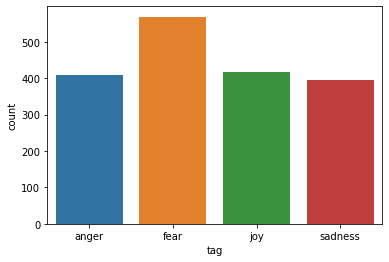

In [20]:
sns.countplot(x='tag', data=fresh_train_data)

In [21]:
fresh_test_data['tag'].value_counts()

fear       471
joy        356
anger      348
sadness    327
Name: tag, dtype: int64

In [23]:
fresh_train_data.to_csv('data/final/clean_train.csv', index=None)
fresh_test_data.to_csv('data/final/clean_test.csv', index=None)

# Dataset - II

In [24]:
data = pd.read_csv('data/base/kaggle_emotion_data.csv')

In [25]:
print(data.shape)
data.head()

(416809, 2)


,text,emotions
0,i feel awful about it too because it s my job ...,sadness
1,im alone i feel awful,sadness
2,ive probably mentioned this before but i reall...,joy
3,i was feeling a little low few days back,sadness
4,i beleive that i am much more sensitive to oth...,love


## Data Cleaning

In [26]:
fresh_data = data.dropna(how='any', axis=0)
fresh_data.shape

(416809, 2)

In [27]:
fresh_data['text'] = fresh_data['text'].apply(clean_data)
print(fresh_data.shape)

(416809, 2)


In [28]:
print(data['text'].iloc[0])
print(fresh_data['text'].iloc[0])

i feel awful about it too because it s my job to get him in a position to succeed and it just didn t happen here
i feel awful about it too because it s my job to get him in a position to succeed and it just didn t happen here


## EDA

In [29]:
fresh_data['emotions'].value_counts()

joy         141067
sadness     121187
anger        57317
fear         47712
love         34554
surprise     14972
Name: emotions, dtype: int64

<AxesSubplot:xlabel='emotions', ylabel='count'>

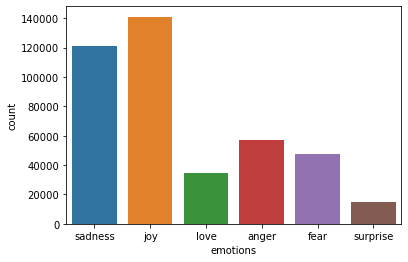

In [30]:
sns.countplot(x='emotions', data=fresh_data)

In [31]:
fresh_data.to_csv('data/final/cleaned_data_kaggle.csv', index=None)